# TAL Labo 1b : Segmentation de textes avec NLTK

**Objectifs**

Le but de cette deuxième partie du Labo 1 du [Cours TAL](https://cyberlearn.hes-so.ch/course/view.php?id=14966) est d'effectuer quelques opérations élémentaires sur les textes en utilisant la boîte à outils [NLTK](http://www.nltk.org/) en Python.  Vous utiliserez l'environnement mis en place dans la partie 1a : [Python 3.7 ou 3.8](https://www.python.org/) avec _notebooks_ [Jupyter](https://jupyter.org/), soit localement sur votre ordinateur (avec ou sans Conda) ou en ligne sur [Google Colab](https://colab.research.google.com).

Vous utiliserez NLTK pour obtenir des textes en ligne ou localement, puis vous les segmenterez en phrases et en mots (appelés aussi _tokens_).  Vous calculerez aussi des statistiques sur ces textes.  Vous travaillerez d'abord sur des textes en anglais (1b et 1c), puis en français (1d).

## 1. NLTK: Natural Language Toolkit

Pour ajouter NLTK à votre installation locale de Python, suivez les instructions sur le [site web NLTK](http://www.nltk.org/install.html).  Sur Google Colab, NLTK est déjà installé.

Pour utiliser NLTK en Python (y compris dans un _notebook_ Jupyter), vous pouvez écrire `import nltk`, puis accéder à toutes les commandes avec le préfixe `nltk.`.  Si vous écrivez `from nltk.book import *`, cela importera des commandes et des variables (p.ex. une collection de textes) qui seront accessibles sans utiliser le préfixe. 

**Remarques**
* Le but de ce laboratoire est de vous initier à NLTK.  Vous pouvez aussi parcourir le [Chapitre 1](http://www.nltk.org/book/ch01.html) du [livre NLTK (*NLP with Python*)](http://www.nltk.org/book/) et essayer les commandes indiquées.  
* Veuillez noter que le [livre en ligne](http://www.nltk.org/book/) est mis à jour pour Python 3, mais la [version imprimée](http://shop.oreilly.com/product/9780596516499.do) que l'on peut parfois trouver en PDF est pour Python 2. 
* NLTK inclut un gestionnaire de téléchargements qui peut être invoqué depuis un interpréteur Python en ligne de commande (écrire `python3` en ligne de commande) avec les deux commandes `import nltk` puis `nltk.download()`.  Cela vous permettra de télécharger de nombreux corpus _additionnels_ (i.e. collections de textes), mais que nous n'utiliserons pas en laboratoire.

In [1]:
import nltk
#from nltk.book import *
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gilli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Écrivez une phrase en anglais (liste de mots / string) que vous appelerez `sentence1`.  

Affichez sa longueur avec `len()`.  

Utilisez `nltk.bigrams` pour générer tous les bi-grammes (couples de mots adjacents) à partir de cette liste.  Un exemple est montré dans la [section 3.3 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#collocations-and-bigrams).  

Enfin, trier les bi-grammes par ordre alphabétique et afficher le résultat.

In [2]:
# Please write your Python code in this cell and execute it.
sentence1 = "I like to eat hamburgers."
print(len(sentence1))
list(nltk.bigrams(sentence1.split(" ")))

25


[('I', 'like'), ('like', 'to'), ('to', 'eat'), ('eat', 'hamburgers.')]

Défnissez une chaîne appelée `string2` contenant une phrase.  Utilisez le *tokenizer* de NLTK (fonction `nltk.word_tokenize`, expliquée dans la [section 3.1 du livre NLTK](http://www.nltk.org/book/ch03.html#sec-accessing-text)) pour segmenter la chaîne en mots, qui seront rassemblés dans une liste que vous appelerez `sentence2`.  Affichez cette liste.

In [3]:
# Please write your Python code in this cell and execute it.
string2 = "Joseph ate all my hamburgers, now I'm very sad."
tokens = nltk.word_tokenize(string2)
tokens

['Joseph',
 'ate',
 'all',
 'my',
 'hamburgers',
 ',',
 'now',
 'I',
 "'m",
 'very',
 'sad',
 '.']

## 2. Utiliser NLTK pour télécharger, segmenter et sauvegarder un texte

Inspirez-vous du [chapitre 3 (3.1. Processing Raw Text) du livre NLTK](http://www.nltk.org/book/ch03.html) pour télécharger un fichier avec du texte en ligne, par exemple un livre anglais du Projet Gutenberg.  Stocker le contenu dans une chaîne.

In [4]:
from urllib import request
# Please write your Python code below and execute it.
url = "http://www.gutenberg.org/files/2554/2554-0.txt"
response = request.urlopen(url)
raw = response.read().decode('utf8')

En inspectant la chaîne précédente, déterminez quelle partie du début et de la fin il faut enlever pour garder le texte principal.  Vous pouvez utiliser la notation dite de *slicing* en Python, ou identifier les chaînes où commence et finit le véritable texte.  Quelle est la longueur de ce texte en caractères ?  (Lien utile : [support d'Unicode dans Python](https://docs.python.org/3.7/howto/unicode.html).)

In [5]:
# Please write your Python code below and execute it.
import re
cropped = raw[raw.find("PART I"):raw.rfind("*** END OF THE PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT ***")]
stripped = cropped.replace('\r', '').replace('\n', ' ')
clean = re.sub(r'\s+', ' ', stripped)

Vous allez maintenant segmenter le texte en phrases et les écrire dans un fichier avec une phrase par ligne.  Vous allez également segmenter chaque phrase en _tokens_ (mots et ponctuations), et créer un autre fichier, avec une phrase par ligne, et un espace entre chaque _token_.  Vous aurez besoin des fonctions suivantes de nltk:
* `nltk.sent_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.word_tokenize)) (notez que le nom "sentence tokenize" n'est pas très logique)
* `nltk.word_tokenize(...)` (documentée [ici](https://www.nltk.org/api/nltk.tokenize.html#nltk.tokenize.sent_tokenize))

**Segmentez le texte en phrases avec NLTK.** Affichez le nombre de phrases obtenues, et un court extrait de 5-6 phrases.  Comment appréciez-vous la qualité de la segmentation ?  *Note :* si certains caractères spéciaux vous semblent péjorer la segmentation, vous pouvez les remplacer dans la chaîne globale avec la fonction `.replace('s1', 's2')`.

In [6]:
# Please write your Python code in this cell and execute it.
sentences = nltk.tokenize.sent_tokenize(clean, language='english')
print(len(sentences))
print(sentences[:6])

11906
['PART I CHAPTER I On an exceptionally hot evening early in July a young man came out of the garret in which he lodged in S. Place and walked slowly, as though in hesitation, towards K. bridge.', 'He had successfully avoided meeting his landlady on the staircase.', 'His garret was under the roof of a high, five-storied house and was more like a cupboard than a room.', 'The landlady who provided him with garret, dinners, and attendance, lived on the floor below, and every time he went out he was obliged to pass her kitchen, the door of which invariably stood open.', 'And each time he passed, the young man had a sick, frightened feeling, which made him scowl and feel ashamed.', 'He was hopelessly in debt to his landlady, and was afraid of meeting her.']


La qualité de la segmentation de notre extrait à l'air correcte. Cependant, les textes comme "PART I" ou "CHAPTER I" sont considérés avec la phrase qui suit ces textes alors qu'ils ne devraient pas être considérés comme faisant partie de la phrase.

Enregistrez le résultat au format texte, en écrivant chaque phrase sur une ligne.  Vérifiez le résultat en examinant le fichier avec un éditeur de texte.

In [7]:
import os

In [8]:
filename1 = "sample_text_1.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_1.txt
if os.path.exists(filename1): 
    os.remove(filename1)
fd = open(filename1, 'a', encoding='utf8')
# Please write your Python code below and execute it.
for sentence in sentences:
    fd.write(sentence + '\n')  # Write the string followed by a newline character

**Segmentez maintenant chaque phrase en tokens (mots et ponctuations).**  Stockez le résultat dans une nouvelle variable (liste de listes).  Affichez quelques phrases et commentez la qualité de la tokenisation.

In [9]:
# Please write your Python code in this cell and execute it.
words = [nltk.word_tokenize(sentence) for sentence in sentences]
words[:6]

[['PART',
  'I',
  'CHAPTER',
  'I',
  'On',
  'an',
  'exceptionally',
  'hot',
  'evening',
  'early',
  'in',
  'July',
  'a',
  'young',
  'man',
  'came',
  'out',
  'of',
  'the',
  'garret',
  'in',
  'which',
  'he',
  'lodged',
  'in',
  'S.',
  'Place',
  'and',
  'walked',
  'slowly',
  ',',
  'as',
  'though',
  'in',
  'hesitation',
  ',',
  'towards',
  'K.',
  'bridge',
  '.'],
 ['He',
  'had',
  'successfully',
  'avoided',
  'meeting',
  'his',
  'landlady',
  'on',
  'the',
  'staircase',
  '.'],
 ['His',
  'garret',
  'was',
  'under',
  'the',
  'roof',
  'of',
  'a',
  'high',
  ',',
  'five-storied',
  'house',
  'and',
  'was',
  'more',
  'like',
  'a',
  'cupboard',
  'than',
  'a',
  'room',
  '.'],
 ['The',
  'landlady',
  'who',
  'provided',
  'him',
  'with',
  'garret',
  ',',
  'dinners',
  ',',
  'and',
  'attendance',
  ',',
  'lived',
  'on',
  'the',
  'floor',
  'below',
  ',',
  'and',
  'every',
  'time',
  'he',
  'went',
  'out',
  'he',
  'was'

La tokenisation est bonne. Les mots sont bien séparés, par exemple les abréviations de noms (S.) sont considérés comme un seul token et non séparés en deux. C'est aussi le cas pour les mots composés (five-storied) qui sont considérés comme un token.

Calculez le nombre total de _tokens_ obtenus.

In [10]:
# Please write your Python code in this cell and execute it.
total = sum(len(word) for word in words)
total

252740

Enregistrez le résultat au format texte, en écrivant chaque phrase sur une ligne et en insérant un espace entre chaque _token_.  Vérifiez le résultat en examinant le fichier avec un éditeur de texte.

In [11]:
filename2 = "sample_text_2.txt"
# Pour un fichier local : chemin relatif par rapport au notebook
# Pour Google Colab, p.ex.: /content/gdrive/My Drive/sample_text_2.txt
if os.path.exists(filename2): 
    os.remove(filename2)
fd = open(filename2, 'a', encoding='utf8')
# Please write your Python code below and execute it.
for sentence in words:
    for word in sentence:
        fd.write(word + ' ')
    fd.write("\n")

Il est également possible de *tokeniser un texte sans le segmenter préalablement en phrases*.
* Effectuez cette opération directement sur la chaîne de caractères contenant tout le texte.  
* Affichez et observez un court extrait. 
* Demandez le nombre total de tokens et comparez-le avec le nombre précédent.  
* Il n'est pas demandé ici d'écrire le résultat dans un fichier.

In [19]:
# Please write your Python code in this cell and execute it.
tokens = nltk.tokenize.word_tokenize(clean, language='english')
print(tokens[:50])
print(len(tokens))

['PART', 'I', 'CHAPTER', 'I', 'On', 'an', 'exceptionally', 'hot', 'evening', 'early', 'in', 'July', 'a', 'young', 'man', 'came', 'out', 'of', 'the', 'garret', 'in', 'which', 'he', 'lodged', 'in', 'S.', 'Place', 'and', 'walked', 'slowly', ',', 'as', 'though', 'in', 'hesitation', ',', 'towards', 'K.', 'bridge', '.', 'He', 'had', 'successfully', 'avoided', 'meeting', 'his', 'landlady', 'on', 'the', 'staircase']
252740


On obtient exactement le même nombre

## 3. Calculer diverses statistiques avec NLTK
Pour calculer des statistiques, il faut d'abord créer un objet de type `nltk.Text`.  Ces objets peuvent être créés avec : 
1. la chaîne de caractères constituant le texte
2. la liste de tous les mots du texte (chaînes)
3. la liste de toutes les phrases (liste de listes)

**Attention:**

* seule l'option (2) permet d'utiliser correctement les méthodes de `nltk.Text`
* les méthodes `nltk.word_tokenize()` et `nltk.sent_tokenize()` s'appliquent à des chaînes, pas des `nltk.Text`

Créez et stockez dans une variable un objet `nltk.Text` à partir de la liste des tokens de votre texte.  (Vous pouvez appeler ici `nltk.word_tokenize`.)

In [21]:
# Please write your Python code in this cell and execute it.
text = nltk.Text(nltk.word_tokenize(clean, language='english'))

<Text: PART I CHAPTER I On an exceptionally hot...>

Le [chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html) montre des exemples d'opérations que l'on peut effectuer sur un objet `nltk.Text`.  Par exemple, on peut afficher les occurrences d'un mot et leur contexte immédiat avec la méthode `concordance`, ou trouver des mots qui ont des contextes semblables à un mot donné avec `similar`.  Veuillez expérimenter ci-dessous avec ces deux méthodes et afficher un résultat à chaque fois.

In [23]:
# Please write your Python code in this cell and execute it.
text.concordance("young")

Displaying 25 of 112 matches:
tionally hot evening early in July a young man came out of the garret in which 
open . And each time he passed , the young man had a sick , frightened feeling 
mer -- all worked painfully upon the young man ’ s already overwrought nerves .
 disgust gleamed for a moment in the young man ’ s refined face . He was , by t
lated bitterness and contempt in the young man ’ s heart , that , in spite of a
his voice and pointing at him -- the young man stopped suddenly and clutched tr
 were employed on the building . The young man was very glad to meet none of th
der , and opened the door wide . The young man stepped into the dark entry , wh
d and groaned at every instant . The young man must have looked at her with a r
nt , I came here a month ago , ” the young man made haste to mutter , with a ha
ir. ” The little room into which the young man walked , with yellow paper on th
 “ Lizaveta ’ s work , ” thought the young man . There was not a speck of dust 
 “ A roubl

In [24]:
# Please write your Python code in this cell and execute it.
text.similar("young")

drunken a old little clever mad the much good generous poor sensible
dead more sick so seen bad different stupid


En utilisant la méthode `collocation_list`, veuilez afficher les 10 collocations les plus fréquentes dans votre texte.

In [27]:
# Please write your Python code in this cell and execute it.
nltk.download('stopwords')
text.collocation_list()[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gilli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('Katerina', 'Ivanovna'),
 ('Pyotr', 'Petrovitch'),
 ('Pulcheria', 'Alexandrovna'),
 ('Avdotya', 'Romanovna'),
 ('Rodion', 'Romanovitch'),
 ('Marfa', 'Petrovna'),
 ('Sofya', 'Semyonovna'),
 ('old', 'woman'),
 ('Porfiry', 'Petrovitch'),
 ('Amalia', 'Ivanovna')]

On peut déterminer le vocabulaire d'un texte (c'est-à-dire la liste des _types_) simplement en convertissant la liste des mots (occurrences ou _tokens_) à un `set` en Python.  
* Veuillez calculer ainsi le vocabulaire de votre texte.
* Combien de mots différents a-t-il ?  (En incluant les ponctuations et tout autre symbole.) 
* Quels sont les mots qui ont plus de 15 lettres ?  (Ou une autre taille qui vous semble intéressante.)

In [35]:
# Please write your Python code in this cell and execute it.
types = set(tokens)
print(len(types))
print([word for word in types if len(word) > 15])

11012
['self-confidently', 'straight-forward', 'terrible-looking', 'disproportionately', '_psychologically_', 'well-proportioned', 'poverty-stricken', '_Hof-kriegsrath_', 'waistcoat-pocket', 'evil-intentioned', 'grey-and-rainbow-coloured', 'Governor-General', 'Schleswig-Holstein', 'half-broken-down', 'pawnbroker-woman', 'cross-examination', 'Cough-cough-cough', 'misunderstanding', 'conscience-prick', 'frightened-looking', 'delicate-looking', 'indistinguishable', 'horrible-looking', 'disproportionate', 'indiscriminately', 'enthusiastically', 'circumstantially', 'superciliousness', 'governor-general', 'sinister-looking']


**Distributions de fréquence (Frequency Distributions)**

NLTK peut facilement calculer les fréquences de tous les _tokens_ dans un `nltk.Text`.  Le résultat est stocké dans un objet de type `FreqDist` (pour _frequency distribution_) comme montré dans la [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).  À partir de là, on peut déterminer les mots les plus fréquents.

Veuillez construire la distribution de fréquences de votre texte.

In [37]:
# Please write your Python code in this cell and execute it.
freq = nltk.FreqDist(text)

Affichez les mots qui ont plus de 4 lettres parmi les 70 mots les plus fréquents.

In [67]:
# Please write your Python code in this cell and execute it.
freq_words = [(word, count) for word, count in freq.most_common() if len(word) > 4][:70]
freq_words

[('Raskolnikov', 782),
 ('there', 597),
 ('would', 552),
 ('about', 522),
 ('could', 485),
 ('though', 411),
 ('Sonia', 399),
 ('again', 380),
 ('Razumihin', 344),
 ('himself', 334),
 ('which', 324),
 ('Dounia', 321),
 ('before', 307),
 ('thought', 305),
 ('Ivanovna', 301),
 ('looked', 293),
 ('Petrovitch', 286),
 ('something', 283),
 ('little', 278),
 ('still', 267),
 ('began', 264),
 ('suddenly', 262),
 ('nothing', 258),
 ('cried', 240),
 ('first', 220),
 ('their', 217),
 ('Katerina', 216),
 ('without', 214),
 ('should', 213),
 ('right', 212),
 ('almost', 208),
 ('Svidrigaïlov', 205),
 ('There', 204),
 ('Porfiry', 204),
 ('moment', 203),
 ('after', 203),
 ('mother', 202),
 ('woman', 200),
 ('think', 198),
 ('looking', 192),
 ('other', 187),
 ('asked', 187),
 ('another', 186),
 ('seemed', 184),
 ('shall', 182),
 ('going', 179),
 ('stood', 175),
 ('turned', 175),
 ('understand', 173),
 ('Pyotr', 173),
 ('quite', 167),
 ('course', 167),
 ('might', 163),
 ('money', 163),
 ('perhaps', 161

## 4. Graphiques
La librairie `matplotlib` permet d'afficher les statistiques des textes sous forme graphique.  Pour la rendre accessible dans le _notebook_ (une fois installée dans Python), il faut exécuter les deux lignes suivantes.

Nous allons utiliser les fonctions graphiques de NLTK, mais il est possible de générer directement des graphiques à partir de deux listes `x_values` et `y_values` avec la commande `matplotlib.pyplot.plot(x_values, y_values)`.

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

Affichez le graphique cumulatif des nombres d'occurrences des 70 mots les plus fréquents de votre texte, en vous inspirant de la  [section 3.1 du chapitre 1 du livre NLTK](http://www.nltk.org/book/ch01.html#frequency-distributions).

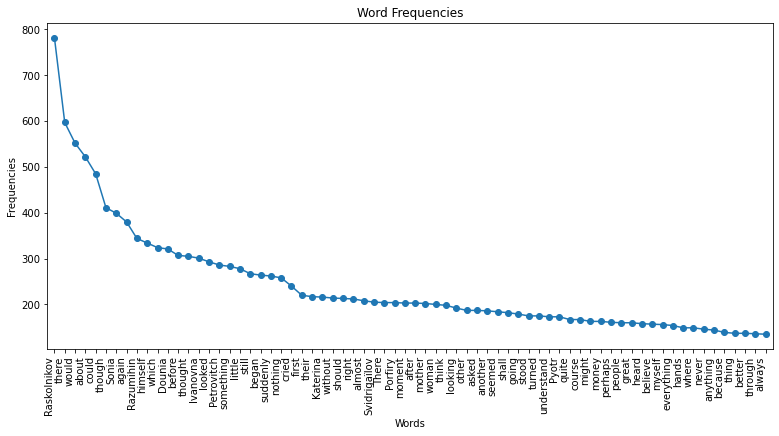

In [68]:
# Please write your Python code in this cell and execute it.
#data = freq.most_common(70)
data = freq_words
words = [item[0] for item in data]
frequencies = [item[1] for item in data]

plt.figure(figsize=(13, 6))
plt.plot(words, frequencies, marker='o')
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Word Frequencies')
plt.xticks(rotation=90, ha='right')
plt.gca().margins(x=0.01)
plt.gcf().canvas.draw()
plt.show()

Maintenant, construisez une liste avec la longueur de chaque _token_ du texte (la liste aura donc autant de nombres que de tokens).  Créez un nouvel objet `FreqDist` à partir de cette liste, et affichez la distribution (cette fois-ci _non_-cumulative) des nombres d'occurrences.  Quelle est la longueur la plus fréquente ?  Comment évolue la longueur en fonction de la fréquence ?

Most common word length
[(1, 55348)]
[(1, 55348), (3, 51865), (4, 37822), (2, 37560), (5, 20170), (6, 15139), (7, 12773), (8, 8735), (9, 5482), (10, 3558), (11, 2271), (12, 1251), (13, 515), (14, 142), (15, 67), (16, 27), (17, 11), (18, 3), (25, 1)]


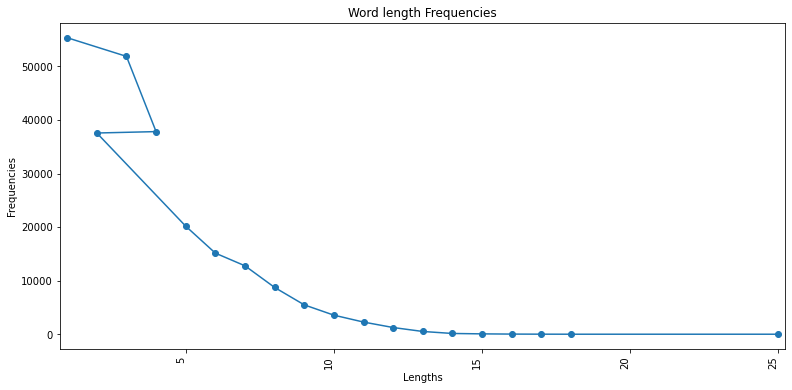

In [88]:
# Please write your Python code in this cell and execute it.
lengths = [len(token) for token in tokens]
freq_len = nltk.FreqDist(lengths)
print("Most common word length")
print(freq_len.most_common(1))

data = freq_len.most_common(25)

lengths = [item[0] for item in data]
frequencies = [item[1] for item in data]

plt.figure(figsize=(13, 6))
plt.plot(lengths, frequencies, marker='o')
plt.xlabel('Lengths')
plt.ylabel('Frequencies')
plt.title('Word length Frequencies')
plt.xticks(rotation=90, ha='right')
plt.gca().margins(x=0.01)
plt.gcf().canvas.draw()
plt.show()

L'évolution est régulière, c'est-à-dire que ça devient progressivement moins fréquent pour les longueurs de mots. Il y a juste pour les mots de longueurs 2 qui sont moins fréquents que les mots de longueur 3 et 4.

## Fin de la partie 1b
Veuillez nettoyer autant que possible ce _notebook_, exécutez une dernière fois toutes les cellules pour obtenir les résultats demandés, et enregistrez le _notebook_.  Puis ajoutez-le dans une archive _zip_ avec les _notebook_ des parties 1c et 1d, et soumettez l'archive individuellement sur Cyberlearn (_Laboratoire 1_). 